In [1]:
import os
import re
import pandas as pd
from collections import Counter
from random import sample
import regex as re
import spacy

In [2]:
from spacy.lang.pl import Polish
nlp = Polish()
# Create a Tokenizer with the default settings for English
# including punctuation rules and exceptions
tokenizer = nlp.tokenizer

In [3]:
directory = 'ustawy'

def load_bills(directory):
    bills = {}
    for file_name in os.listdir(directory):
        path = os.path.join(directory, file_name)
        if os.path.isfile(path):
            with open(path, encoding='utf-8') as f:
                content = f.read()
                content = content.replace("\xa0", " ").replace("\xad", "")
                content = re.sub(r"\s+", " ", content)
                content = content.lower()
                bills[file_name] = content
    return bills
bills = load_bills(directory)

### Use SpaCy tokenizer API to tokenize the text from the cleaned law corpus.

In [4]:
tokenized_bills = {name: [token.text for token in tokenizer(content)] for name, content in bills.items()}

In [5]:
tokenized_bills['2004_1264.txt']

[' ',
 'dz.u',
 '.',
 'z',
 '2004',
 'r',
 '.',
 'nr',
 '121',
 ',',
 'poz',
 '.',
 '1264',
 'u',
 's',
 't',
 'a',
 'w',
 'a',
 'z',
 'dnia',
 '20',
 'kwietnia',
 '2004',
 'r',
 '.',
 'o',
 'zmianie',
 'ustawy',
 'o',
 'emeryturach',
 'i',
 'rentach',
 'z',
 'funduszu',
 'ubezpieczeń',
 'społecznych',
 'oraz',
 'niektórych',
 'innych',
 'ustaw[1',
 ']',
 'art',
 '.',
 '1',
 '.',
 'w',
 'ustawie',
 'z',
 'dnia',
 '17',
 'grudnia',
 '1998',
 'r',
 '.',
 'o',
 'emeryturach',
 'i',
 'rentach',
 'z',
 'funduszu',
 'ubezpieczeń',
 'społecznych',
 '(',
 'dz.u',
 '.',
 'z',
 '2004',
 'r',
 '.',
 'nr',
 '39',
 ',',
 'poz',
 '.',
 '353',
 ')',
 'wprowadza',
 'się',
 'następujące',
 'zmiany',
 ':',
 '1',
 ')',
 'w',
 'art',
 '.',
 '4',
 ':',
 'a',
 ')',
 'po',
 'pkt',
 '4',
 'dodaje',
 'się',
 'pkt',
 '4a',
 'w',
 'brzmieniu',
 ':',
 '"',
 '4a',
 ')',
 'kwota',
 'rocznej',
 'podstawy',
 'wymiaru',
 'składek',
 'na',
 'ubezpieczenia',
 'emerytalne',
 'i',
 'rentowe',
 '-',
 'roczną',
 'podstawę',

### Compute frequency list for each of the processed files.

In [6]:
frequency_list = {name: Counter(content) for name, content in tokenized_bills.items()}

In [7]:
for name, cnt in sample(list(frequency_list.items()), 10):
    print(f"{name}: {cnt.most_common(8)}")

2000_1008.txt: [(',', 366), ('.', 334), ('w', 208), ('"', 141), (')', 134), ('i', 120), ('komitetu', 86), ('ust', 74)]
1994_395.txt: [('.', 29), (',', 18), ('z', 9), ('nr', 7), ('poz', 7), ('r', 6), ('o', 5), ('w', 5)]
2001_811.txt: [(',', 783), ('.', 761), ('w', 361), ('gmo', 292), (')', 258), ('do', 213), ('i', 178), ('o', 173)]
1999_875.txt: [('.', 29), (',', 19), ('w', 17), (')', 16), ('i', 9), ('"', 8), ('2', 7), ('r', 6)]
2001_423.txt: [('.', 50), ('akademii', 30), ('w', 28), ('sztuk', 17), ('pięknych', 16), ('katowicach', 12), (',', 11), ('filii', 10)]
1997_485.txt: [('.', 178), (',', 131), ('w', 130), ('"', 86), ('ust', 56), (')', 55), ('art', 46), ('się', 38)]
2004_1800.txt: [('.', 52), (',', 32), ('w', 21), ('z', 9), (')', 9), ('i', 9), ('o', 8), ('r', 7)]
2004_1647.txt: [('.', 82), (',', 38), ('w', 30), ('z', 26), ('rolników', 23), ('art', 20), ('rolniczych', 20), ('o', 16)]
2001_1117.txt: [('.', 118), (',', 112), ('nr', 47), ('poz', 47), ('w', 39), ('"', 34), ('i', 25), ('o

### Aggregate the result to obtain one global frequency list.

In [8]:
frequency_global = Counter()

for score in frequency_list.values():
    frequency_global += score

In [9]:
frequency_global.most_common(10)

[('.', 431293),
 (',', 341126),
 ('w', 201200),
 (')', 100195),
 ('i', 90006),
 ('art', 83804),
 ('z', 82438),
 ('1', 72952),
 ('o', 64776),
 ('-', 61714)]

### Reject all entries that are shorter than 2 characters or contain non-letter characters (make sure to include Polish diacritics).

In [10]:
filtered_freq = Counter()

In [11]:
#regex = re.compile(r'[\W\d]')
for entry, score in frequency_global.items():
    if (len(entry)>1) and (entry.isalpha()):   #(regex.search(entry) is None):
        filtered_freq[entry] = score

In [12]:
filtered_freq.most_common(30)

[('art', 83804),
 ('do', 60732),
 ('ust', 53636),
 ('na', 50643),
 ('się', 45886),
 ('lub', 45800),
 ('poz', 45224),
 ('nr', 44942),
 ('oraz', 33558),
 ('mowa', 28783),
 ('nie', 22988),
 ('przez', 20951),
 ('pkt', 19124),
 ('dnia', 17954),
 ('których', 17934),
 ('od', 16683),
 ('po', 13546),
 ('jest', 13197),
 ('ustawy', 13099),
 ('może', 12096),
 ('jeżeli', 12038),
 ('którym', 11790),
 ('za', 11142),
 ('brzmienie', 10576),
 ('spraw', 10021),
 ('otrzymuje', 9835),
 ('albo', 8708),
 ('dodaje', 8423),
 ('ich', 8199),
 ('dla', 7934)]

### Make a plot in a logarithmic scale

In [13]:
df = pd.DataFrame({
        'token' : filtered_freq.keys(),
        'score' : filtered_freq.values()})

In [14]:
df.sort_values(['score', 'token'], inplace = True, ascending = False, ignore_index = True)

In [15]:
df.shape[0]

55159

In [16]:
df['rank'] = range(1, df.shape[0] + 1)

In [17]:
df

,token,score,rank
0,art,83804,1
1,do,60732,2
2,ust,53636,3
3,na,50643,4
4,się,45886,5
...,...,...,...
55154,abonamentu,1,55155
55155,abonamentową,1,55156
55156,abolicję,1,55157
55157,abiotycznymi,1,55158


<AxesSubplot:xlabel='rank'>

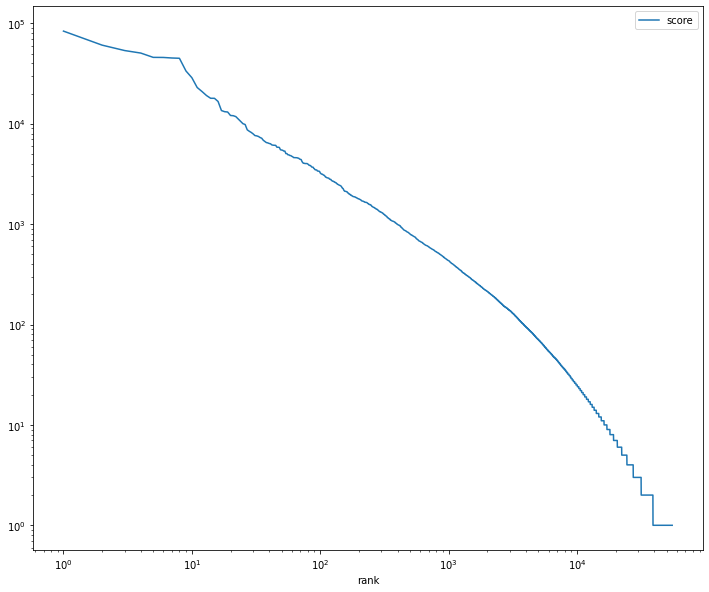

In [18]:
df.plot(x = 'rank', y = 'score', logx=True, logy=True, figsize=(12,10))

### Install Morfeusz and use it to find all words that do not appear in that dictionary.

In [19]:
#!pip install C:/Users/Pablo/Downloads/morfeusz2-1.99.6-20221106-cp39-cp39-win_amd64.whl

In [20]:
import morfeusz2
morf = morfeusz2.Morfeusz()

In [21]:
def check_in_morf(word):
    return morf.analyse(word)[0][2][2] != 'ign'

In [22]:
df_not_in_dict = df[~df['token'].apply(check_in_morf)]

In [23]:
df_not_in_dict

,token,score,rank
6,poz,45224,7
371,późn,1065,372
828,str,516,829
1436,gmo,298,1437
1976,sww,216,1977
...,...,...,...
55147,acetylometadol,1,55148
55148,acetylodihydrokodeinon,1,55149
55149,acetorfina,1,55150
55151,acariosis,1,55152


### Find 30 words with the highest ranks that do not belong to the dictionary.

In [24]:
df_not_in_dict.sort_values(['rank'], ascending = True)[:30]

,token,score,rank
6,poz,45224,7
371,późn,1065,372
828,str,516,829
1436,gmo,298,1437
1976,sww,216,1977
2042,operacyjno,209,2043
2174,skw,196,2175
2198,rolno,194,2199
2209,zm,192,2210
2502,ex,167,2503


### Find 30 random words (i.e. shuffle the words) with 5 occurrences that do not belong to the dictionary.

In [25]:
df_not_in_dict[df_not_in_dict.score == 5].sample(30)

,token,score,rank
24082,inci,5,24083
23787,najmnie,5,23788
23022,siarczano,5,23023
23315,ppkt,5,23316
24146,geodezyjno,5,24147
23137,rci,5,23138
24332,chelatującym,5,24333
22980,sposb,5,22981
24282,difenylopropylo,5,24283
23171,próbobiorców,5,23172


### Use Levenshtein distance and the frequency list, to determine the most probable correction of the words from lists defined in points 8 and 9.

In [70]:
WORDS = Counter({word: count for word, count in filtered_freq.items() if check_in_morf(word)})

In [71]:
def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'aąbcćdeęfghijklmnoópqrstuvwxyzźż'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [72]:
df_corrections = df_not_in_dict.iloc[:30]
df_corrections['correction'] = df_corrections.apply(lambda x: correction(x['token']), axis = 1)
df_corrections

<ipython-input-72-62cfbe5200f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corrections['correction'] = df_corrections.apply(lambda x: correction(x['token']), axis = 1)


,token,score,rank,correction
6,poz,45224,7,po
371,późn,1065,372,plan
828,str,516,829,sar
1436,gmo,298,1437,go
1976,sww,216,1977,swe
2042,operacyjno,209,2043,operacyjne
2174,skw,196,2175,kw
2198,rolno,194,2199,rolne
2209,zm,192,2210,za
2502,ex,167,2503,ix


In [48]:
df_corrections.sample(30)

,token,score,rank,correction
4677,udt,77,4678,ust
1976,sww,216,1977,swe
1436,gmo,298,1437,go
4238,sanitarno,88,4239,sanitarny
371,późn,1065,372,plan
5460,biobójczych,63,5461,biobójczych
3908,uke,97,3909,ue
6,poz,45224,7,po
4366,np,85,4367,na
2571,ike,162,2572,ile


### Load SGJP dictionary (Słownik SGJP dane tekstowe) to ElasticSearch (one document for each form) and use fuzzy matching to obtain the possible corrections of the 30 words with 5 occurrences that do not belong to the dictionary.

In [73]:
import elasticsearch
from elasticsearch import helpers

In [74]:
es = elasticsearch.Elasticsearch("http://localhost:9200")

In [18]:
with open(r"C:\Users\Pablo\Downloads\sgjp-20221106.tab\sgjp-20221106.tab", 'r', encoding='utf-8') as f:
    sgjp = f.read().split('\n')[28:-1]

In [19]:
words = []
for item in sgjp:
    words.append(item.split()[0])

In [20]:
del sgjp

In [75]:
INDEX_NAME = 'sgjp_index'
mapping = {
    "properties": {
      "text": { 
        "type": "text"
      }
    }
}

In [22]:
indx = es.indices.create(index = INDEX_NAME,
                        mappings = mapping)

BadRequestError: BadRequestError(400, 'resource_already_exists_exception', 'index [sgjp_index/GvD8g3N_SxqeLUJwy1IOIg] already exists')

In [25]:
def bulk_words(words):
    for i, word in enumerate(words):
        yield {
            '_index': INDEX_NAME,
            '_id': i,
            'text': word
        }

In [28]:
for success, info in helpers.parallel_bulk(client=es, actions=bulk_words(words)):
    if not success:
        print('A document failed:', info)

In [12]:
#es.count(index = INDEX_NAME)
#es.options(ignore_status=[400,404]).indices.delete(index='bills_index')
#es.indices.get_alias().keys()

ObjectApiResponse({'acknowledged': True})

In [77]:
def correction_es(word):
    res = es.search(index = INDEX_NAME, query = {
            'match': {'text': {'query': word, 'fuzziness': 'AUTO'}}
        })
    if res['hits']['total']['value']>0:
        return res['hits']['hits'][0]['_source']['text']
    else:
        return ""

In [78]:
df_corrections_5 = df_not_in_dict[df_not_in_dict.score == 5].sample(30)
df_corrections_5['correction_es'] = df_corrections_5.apply(lambda x: correction_es(x['token']), axis = 1)
df_corrections_5['correction_Levenshtein'] = df_corrections_5.apply(lambda x: correction(x['token']), axis = 1)

In [79]:
df_corrections_5

,token,score,rank,correction_es,correction_Levenshtein
23060,rr,5,23061,,nr
22676,winopochodne,5,22677,,winopochodne
22510,ym,5,22511,,tym
24139,gj,5,24140,,go
24439,agave,5,24440,agape,agape
23851,mieszkalno,5,23852,mieszkalno,mieszkalne
24009,kj,5,24010,,kg
22709,wapnio,5,22710,Wapnic,wapnia
24422,ami,5,24423,AM-ami,ani
23664,nym,5,23665,Cym,tym


### Draw conclusions regarding:
- the distribution of words in the corpus

In [49]:
import matplotlib.pyplot as plt
import numpy as np

<AxesSubplot:xlabel='rank'>

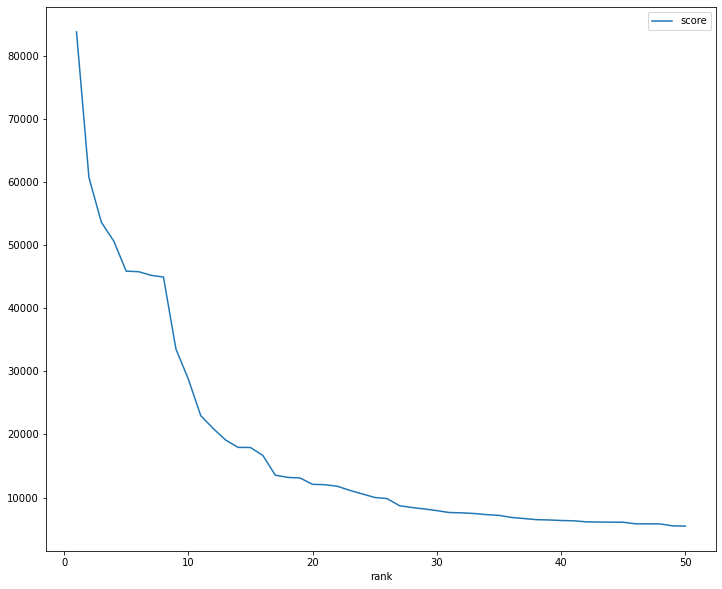

In [43]:
df[:50].plot(x= score, figsize=(12,10))

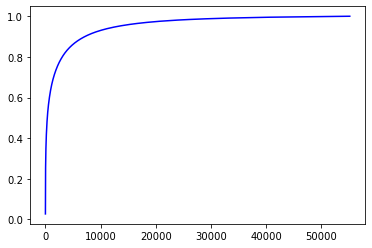

In [58]:
cumulative = np.cumsum(df.score) / np.sum(df.score)
plt.plot(cumulative, c='blue')

In [65]:
np.argwhere(np.array(cumulative)>=0.8)[0]

array([3051], dtype=int64)

Słowa w korpusie są nieregularnie rozłożone. Pierwsze 3051 słów to 80% wielkości korpusu

- the number of true misspellings vs. the number of unknown words

In [68]:
df_not_in_dict.sort_values(['rank'], ascending = True)[:50]

,token,score,rank
6,poz,45224,7
371,późn,1065,372
828,str,516,829
1436,gmo,298,1437
1976,sww,216,1977
2042,operacyjno,209,2043
2174,skw,196,2175
2198,rolno,194,2199
2209,zm,192,2210
2502,ex,167,2503


Wyrazów nieznanych wydaje się być więcej niż literówek. W korpusie wykorzystywanych jest wiele akronimów, które nie są rozpoznawane przez słownik.

- the performance of your method compared to ElasticSearch

Własna metoda trwa krócej. Przy ES najwięcej czasu zajmuje załadowanie korpusu. Dodatkowo ES wymaga postawienia całego oprogramowania przez co trwa to jeszcze dłużej i doprowadza do wyrywania włosów

- the results provided by your method compared to ElasticSearch

In [80]:
df_corrections_5

,token,score,rank,correction_es,correction_Levenshtein
23060,rr,5,23061,,nr
22676,winopochodne,5,22677,,winopochodne
22510,ym,5,22511,,tym
24139,gj,5,24140,,go
24439,agave,5,24440,agape,agape
23851,mieszkalno,5,23852,mieszkalno,mieszkalne
24009,kj,5,24010,,kg
22709,wapnio,5,22710,Wapnic,wapnia
24422,ami,5,24423,AM-ami,ani
23664,nym,5,23665,Cym,tym


Na przykładzie losowych słów występujących 5 razy wydaje się, że to metoda Levenshteina osiąga lepsze wyniki. ES w kilku przypadkach nie znalazł podobnych wyrazów.

- the validity of the obtained corrections